In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.datasets import load_breast_cancer

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_recall_curve

In [66]:
breast = load_breast_cancer()

In [67]:
X = breast.data

In [68]:
Y = breast.target

In [69]:
X =  np.reshape(X,(569,30))

In [70]:
Y = np.reshape(Y,(569,1))

In [71]:
df = pd.DataFrame(Y)

In [72]:
#Doing the SVM for 2 imp components

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
 , columns = ['principal component 1', 'principal component 2'])

In [74]:
finalDf1 = pd.concat([principalDf, df], axis = 1)
finalDf1

,principal component 1,principal component 2,0
0,1160.142574,-293.917544,0
1,1269.122443,15.630182,0
2,995.793889,39.156743,0
3,-407.180803,-67.380320,0
4,930.341180,189.340742,0
...,...,...,...
564,1414.126684,110.222492,0
565,1045.018854,77.057589,0
566,314.501756,47.553525,0
567,1124.858115,34.129225,0


In [75]:
train=finalDf1.sample(frac=0.8,random_state=0) 
test=finalDf1.drop(train.index)

In [76]:
X_train = train.values[:,0:1]
X_test = test.values[:,0:1]

#Y_train = np.array(train.labels)
#Y_test = np.array(test.labels)
Y_train = train.values[:,2]
Y_test = test.values[:,2]
Y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [78]:

grid.fit(X_train,Y_train)

Y_predicted = grid.predict(X_test)
Y_predicted

print(metrics.classification_report(Y_test, Y_predicted))

print(metrics.confusion_matrix(Y_test,Y_predicted))

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85        44
         1.0       0.89      0.93      0.91        70

    accuracy                           0.89       114
   macro avg       0.88      0.87      0.88       114
weighted avg       0.89      0.89      0.89       114

[[36  8]
 [ 5 65]]


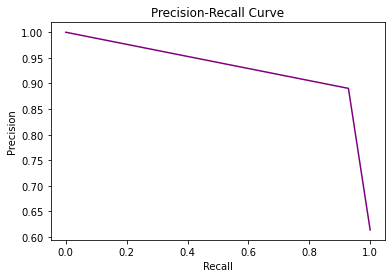

In [79]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test,Y_predicted)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [80]:
#Doing the SVM for 6 imp components

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
 , columns = ['principal component 1', 'principal component 2','principal component 3',
              'principal component 4','principal component 5', 'principal component 6'])

finalDf2 = pd.concat([principalDf, df], axis = 1)
finalDf2

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,0
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,0
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,0
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,0
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,0
...,...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,-0.395424,0
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,-0.059637,0
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,-0.870726,0
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,4.086390,0


In [81]:
train2=finalDf2.sample(frac=0.8,random_state=0) 
test2=finalDf2.drop(train.index)

In [82]:
X_train2 = train2.values[:,0:5]
X_test2 = test2.values[:,0:5]

#Y_train = np.array(train.labels)
#Y_test = np.array(test.labels)
Y_train2 = train2.values[:,6]
Y_test2 = test2.values[:,6]
Y_test2

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train2, Y_train2)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [84]:
grid.fit(X_train2,Y_train2)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [85]:
Y_predicted = grid.predict(X_test2)
Y_predicted

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        44
         1.0       0.90      1.00      0.95        70

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114

[[36  8]
 [ 0 70]]


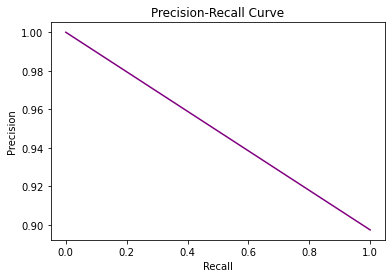

In [86]:
print(metrics.classification_report(Y_test, Y_predicted))

print(metrics.confusion_matrix(Y_test,Y_predicted))


#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test,Y_predicted)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [87]:
#Doing the SVM for 18 imp components

from sklearn.decomposition import PCA
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
 , columns = ['principal component 1', 'principal component 2','principal component 3',
              'principal component 4', 'principal component 5','principal component 6',
              'principal component 7','principal component 8', 'principal component 9',
              'principal component 10', 'principal component 11','principal component 12',
              'principal component 13','principal component 14', 'principal component 15',
              'principal component 16','principal component 17', 'principal component 18'])

finalDf3 = pd.concat([principalDf, df], axis = 1)
finalDf3

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,0
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,-0.307804,0.043452,0.034777,0.065069,-0.012934,-0.002670,0.018300,0.010263,0
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,0.080642,0.033042,0.045485,-0.005534,0.021368,-0.028715,0.012371,-0.006009,0
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,0.279174,-0.020464,0.083505,0.024824,-0.026887,-0.041255,0.008218,-0.028044,0
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,0.927471,-0.174720,0.282556,0.080057,0.043201,-0.034175,0.033742,-0.016965,0
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,0.042228,-0.062721,-0.114247,0.002274,-0.019548,0.019932,-0.019201,0.004024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,-0.395424,-0.786751,0.037082,-0.452530,-0.235185,0.163649,0.052543,-0.075032,-0.015211,-0.061390,-0.054694,-0.004829,-0.011515,0
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,-0.059637,0.449831,0.509154,-0.449986,0.493247,0.007625,0.055832,-0.015163,0.009985,0.003312,-0.020654,0.005197,0.002106,0
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,-0.870726,-2.166493,-0.442279,-0.097398,-0.144667,-0.109147,0.076263,-0.004448,-0.055285,-0.012459,-0.005414,0.007866,-0.004484,0
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,4.086390,-1.705401,-0.359964,0.385030,0.615467,0.307166,-0.028224,0.060561,-0.037742,-0.031873,0.020126,0.015243,0.043651,0


In [88]:
train3=finalDf3.sample(frac=0.8,random_state=0) 
test3=finalDf3.drop(train.index)

In [89]:
X_train3 = train3.values[:,0:17]
X_test3 = test3.values[:,0:17]

#Y_train = np.array(train.labels)
#Y_test = np.array(test.labels)
Y_train3 = train3.values[:,18]
Y_test3 = test3.values[:,18]
Y_test3

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train3, Y_train3)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [91]:
grid.fit(X_train3,Y_train3)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [92]:
Y_predicted = grid.predict(X_test3)
Y_predicted

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        44
         1.0       0.90      1.00      0.95        70

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114

[[36  8]
 [ 0 70]]


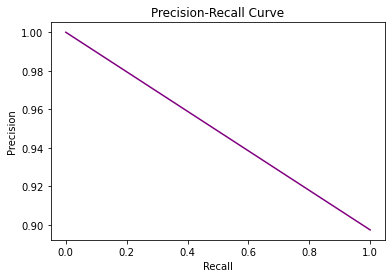

In [93]:
print(metrics.classification_report(Y_test, Y_predicted))

print(metrics.confusion_matrix(Y_test,Y_predicted))


#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test,Y_predicted)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [94]:
# Trying different kernels

In [96]:
# SVM with linear kernel
# SVM with linear kernel and C=100.0
linear_svc=SVC(kernel='linear', C=100.0) 
linear_svc.fit(X_train,Y_train)
# make predictions on test set
Y_pred_test=linear_svc.predict(X_test)
# compute and print accuracy score
print(metrics.classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        44
         1.0       0.91      0.97      0.94        70

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [99]:
#SVM with polynomial kernel and C=1000.0
poly_svc100=SVC(kernel='poly', C=1000.0) 
# fit classifier to training set
poly_svc100.fit(X_train, Y_train)
# make predictions on test set
Y_pred=poly_svc100.predict(X_test)
# compute and print accuracy score
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79        44
         1.0       0.82      1.00      0.90        70

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114



In [100]:
# Run SVM with sigmoid kernel
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 
# fit classifier to training set
sigmoid_svc100.fit(X_train,Y_train)
# make predictions on test set
Y_pred=sigmoid_svc100.predict(X_test)
# compute and print accuracy score
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        44
         1.0       0.84      0.84      0.84        70

    accuracy                           0.81       114
   macro avg       0.80      0.80      0.80       114
weighted avg       0.81      0.81      0.81       114



In [103]:
#accuracy graph
count = 30
while(count >= 2):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=count)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)
    finalDfi = pd.concat([principalDf, df], axis = 1)

    traini=finalDfi.sample(frac=0.8,random_state=0) 
    testi=finalDfi.drop(traini.index)
    X_traini = traini.values[:,0:count-1]
    X_testi = testi.values[:,0:count-1]


    Y_traini = traini.values[:,count]
    Y_testi = testi.values[:,count]

    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC
    param_grid = {'C': [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf']}
    grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
    grid.fit(X_traini, Y_traini)

    grid.fit(X_traini,Y_traini)

    Y_predicted = grid.predict(X_testi)
    
    print(metrics.accuracy_score(Y_testi, Y_predicted))
    count = count - 1
    

0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9298245614035088
0.9385964912280702
0.9122807017543859
0.8859649122807017
